In [1]:
import numpy as np

In [2]:
def conv(image, im_filter):
    """
    :param image: grayscale image as a 2-dimensional numpy array
    :param im_filter: 2-dimensional numpy array
    """
    # input dimensions
    height = image.shape[0]
    width = image.shape[1]
    # output image with reduced dimensions
    im_c = np.zeros((height - len(im_filter) + 1, width - len(im_filter) + 1))
    # iterate over all rows and columns
    for row in range(len(im_c)):
        for col in range(len(im_c[0])):
            # apply the filter
            for i in range(len(im_filter)):
                for j in range(len(im_filter[0])):
                    im_c[row, col] += image[row + i, col + j] * im_filter[i][j]

    # fix out-of-bounds values
    im_c[im_c > 255] = 255
    im_c[im_c < 0] = 0
    # plot images for comparison
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    plt.figure()
    plt.imshow(image, cmap=cm.Greys_r)
    plt.show()
    plt.imshow(im_c, cmap=cm.Greys_r)
    plt.show()

In [3]:
import requests
from PIL import Image
from io import BytesIO
# load the image
# url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Commander_Eileen_Collins_-_GPN-2000-001177.jpg/382px-Commander_Eileen_Collins_-_GPN-2000-001177.jpg?download"
# resp = requests.get(url)
# resp.content

with open("382px-Commander_Eileen_Collins_-_GPN-2000-001177.jpg", "rb") as image:
    image_rgb = np.asarray(Image.open(BytesIO(image.read())).convert("RGB"))
    # convert to grayscale
    image_grayscale = np.mean(image_rgb, axis=2, dtype=np.uint)

print(image_grayscale.shape)
image_grayscale

(478, 382)


array([[177, 170, 140, ...,  91,  91,  91],
       [177, 173, 123, ...,  91,  91,  91],
       [174, 158,  81, ...,  94,  94,  94],
       ...,
       [ 47,  38,  28, ...,   0,   0,   0],
       [ 45,  36,  28, ...,   0,   0,   0],
       [ 42,  33,  27, ...,   0,   0,   0]], dtype=uint64)

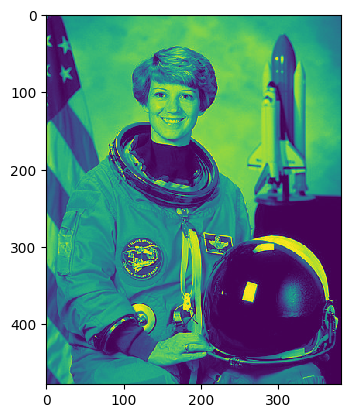

In [4]:
from matplotlib import pyplot as plt
plt.imshow(image_grayscale, interpolation='nearest')
plt.show()

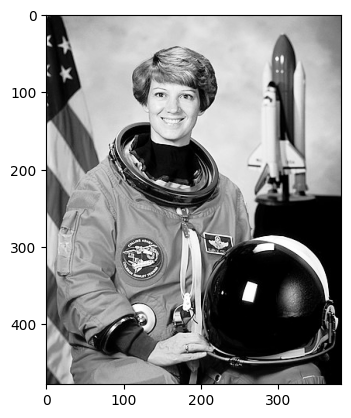

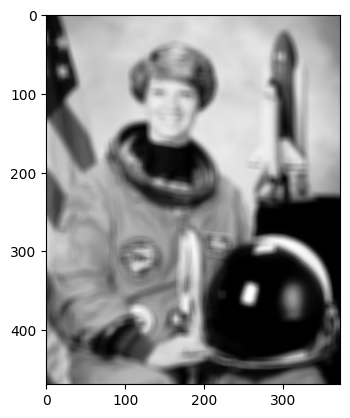

In [5]:
# blur filter
blur = np.full([10,10], 1./100)
conv(image_grayscale, blur)

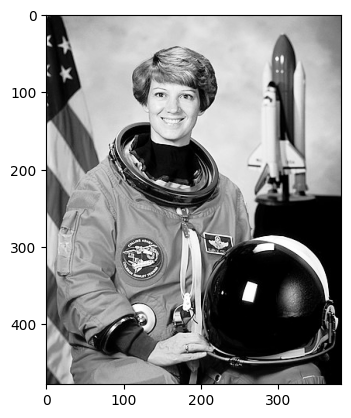

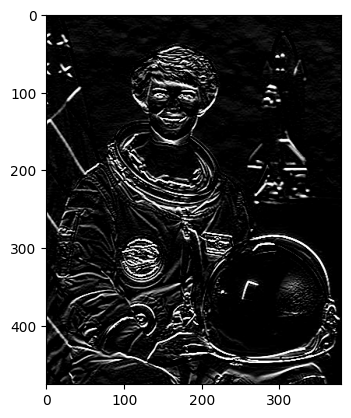

In [8]:
# Sobre edge detectors
sobel_x = [
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
]
conv(image_grayscale, sobel_x)


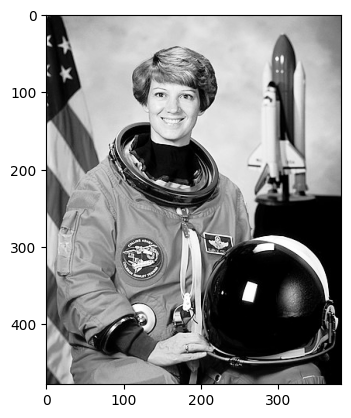

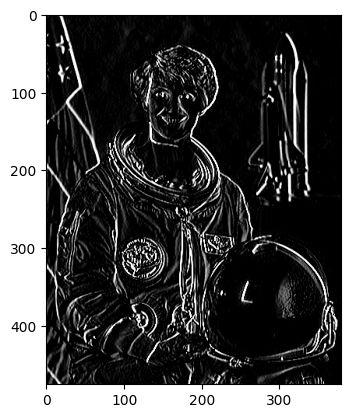

In [9]:
sobel_y = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
]
conv(image_grayscale, sobel_y)

Stopped at:


Stride and padding in convolutional layers